<a href="https://colab.research.google.com/github/primonmari/Marchine_Learn-Classification-Models/blob/main/5Models_Classific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fatores de risco para doenças cardiovasculares

#1° Problema de Negócio
 
Analisar o efeito do estilo de vida e fatores ambientais sobre o risco de doença cardiovascular.Prevendo os riscos de diferentes faixas etárias com base em suas características demográficas, como sexo, altura, peso e tabagismo.Detectando padrões entre os níveis de atividade física, pressão arterial e níveis de colesterol com probabilidade de desenvolver doenças cardiovasculares entre os indivíduos.

O conjunto de dados fornece um excelente recurso para os pesquisadores aplicarem técnicas modernas de aprendizado de máquina para explorar as possíveis relações entre fatores de risco e doenças cardiovasculares que podem levar a uma melhor compreensão desse grave problema de saúde e projetar melhores medidas preventivas.


.

Fonte dos Dados:

Usaremos a base de dados "heart_data.csv" originada por meio dos dados fornecidos para o Kangle.

.
Base de dados: https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas

Download:
https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/download?datasetVersionNumber=2

.

Arquitetura dos Dados (AD):


idade:	Idade do indivíduo. (Inteiro)

gênero:	Gênero do indivíduo. (Corda)

altura:	Altura do indivíduo em centímetros. (Inteiro)

peso:	Peso do indivíduo em quilogramas. (Inteiro)

ap_hi:	Leitura da pressão arterial sistólica. (Inteiro)

ap_lo:	Leitura da pressão arterial diastólica. (Inteiro)

colesterol:	Nível de colesterol do indivíduo. (Inteiro)

gluc:	Nível de glicose do indivíduo. (Inteiro)

fumaça:	Status de fumante do indivíduo. (Boleano)

álcool:	Estado de consumo de álcool do indivíduo. (Boleano)

ativo:	Nível de atividade física do indivíduo. (Boleano)

cardio:	Presença ou ausência de doença cardiovascular. (Boleano)





#2° Análise Exploratória dos Dados - Conhecer os dados


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando Bibliotecas
import pandas as pd
import numpy as nd
import statistics as sts

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (cohen_kappa_score, confusion_matrix, accuracy_score,
precision_score, recall_score, f1_score,roc_auc_score, roc_curve, auc, r2_score)


#A biblioteca Missingno oferece uma maneira muito boa de visualizar a distribuição de valores NaN
import missingno as msno
import statistics  as sts #divisão dos dados de teste 
#caminho de arquivo de saúde: passo para a estring o caminho/endereço dos dados
health_file_path ='/content/drive/MyDrive/kaggle/heart_data.csv'

#caminho de arquivo de saúde: passo para a estring o caminho/endereço dos dados

#health_file_path ='/content/drive/MyDrive/heart_data.csv'

#dados de saúde: pega os dados em formato csv e transforma no dataframe(tabela). Conectando nos dados
health_data = pd.read_csv(health_file_path)

**Inicio ao tratamento**

In [ ]:
#Imprime na tela os primeiros registros
#posso passar parâmetro, por default são os 5 primeiros
health_data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
#verificando quantas linhas e colunas há
health_data.shape

(70000, 14)

In [ ]:
##describe: dá várias características dos dados(estatísticas), contagem linhas,média, min, máx 
health_data.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#mostra os dados do dataframe sem tratamento 
health_data

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Verifica se há valores ausentes
health_data.isna().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#remove linhas que estão faltando
#nesse caso não preciso remover pois nao tem valores ausentes

health_data = health_data.dropna(axis=0)

In [ ]:
# Verifica se ainda a valores ausentes, pois já fiz a remoção
health_data.isna().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#mostra os dados do dataframe após tratamento
health_data

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# contagem da classe alvo
contagem = health_data['cardio'].value_counts()
print(f"População sem problemas cardiacos: {contagem[0]}")
print(f"População com problemas cardiacos: {contagem[1]}")

População sem problemas cardiacos: 35021
População com problemas cardiacos: 34979


0 - pacientes não cardiacos | 1 - pacientes cardiacos



/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


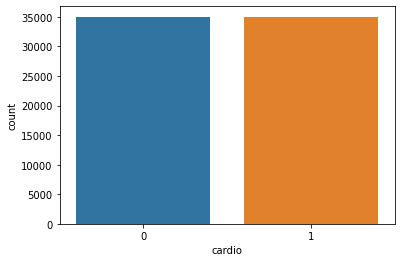

In [ ]:
# plotar gráfico de barras para as Classes
sns.countplot('cardio', data=health_data);
print('0 - pacientes não cardiacos | 1 - pacientes cardiacos\n')

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = health_data.select_dtypes(include=numerics)
df_numeric

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
atrib = df_numeric
atrib

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


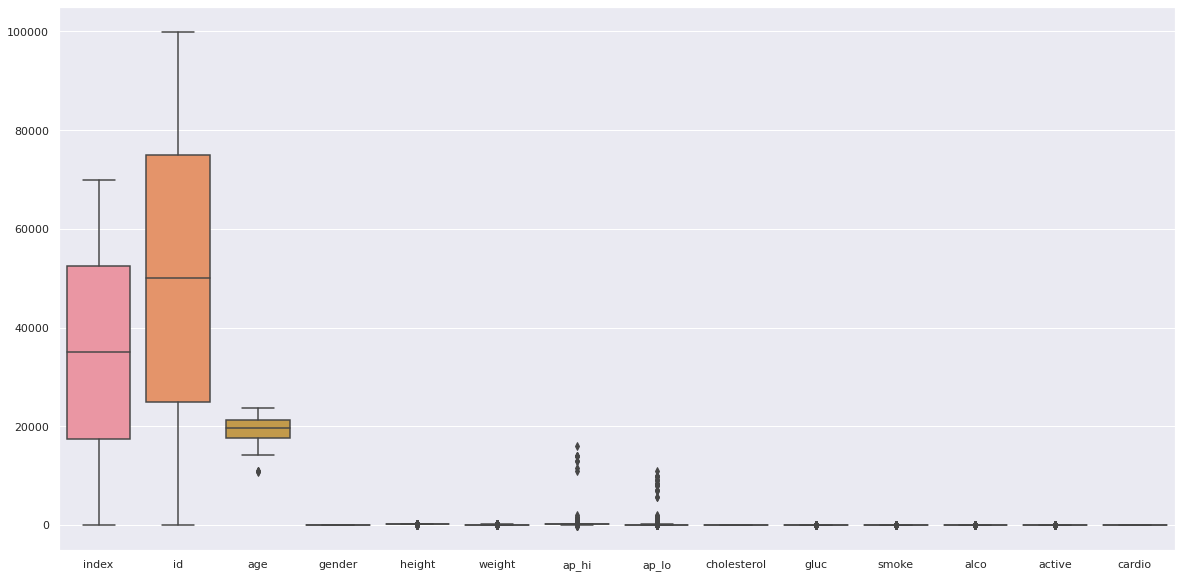

In [ ]:
#o código produz um boxplot que permite visualizar a distribuição dos dados 
#numéricos presentes no dataframe df_numeric.
sns.set(rc={'figure.figsize': (20, 10)}) 
ax = sns.boxplot(data=df_numeric)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


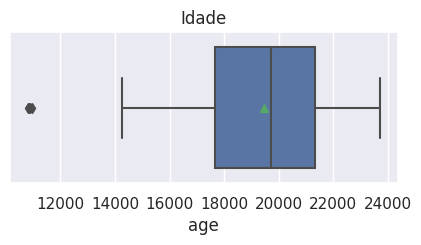

In [ ]:
#boxplot para a coluna 'age' do dataframe health_data, exibindo informações como 
#quartis, mediana e outliers, e também a média dos dados.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['age'],showmeans=True).set_title('Idade')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


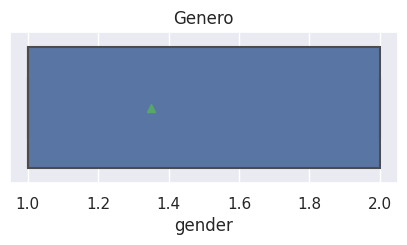

In [ ]:
#boxplot para a coluna 'age' do dataframe health_data, exibindo informações como 
#quartis, mediana e outliers, e também a média dos dados.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['gender'],showmeans=True).set_title('Genero')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


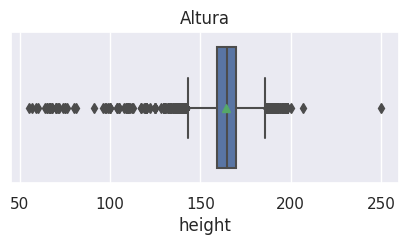

In [ ]:
#boxplot para a coluna 'age' do dataframe health_data, exibindo informações como 
#quartis, mediana e outliers, e também a média dos dados.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['height'],showmeans=True).set_title('Altura')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


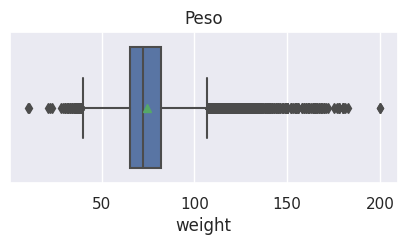

In [ ]:
#boxplot para a coluna 'age' do dataframe health_data, exibindo informações como 
#quartis, mediana e outliers, e também a média dos dados.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['weight'],showmeans=True).set_title('Peso')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


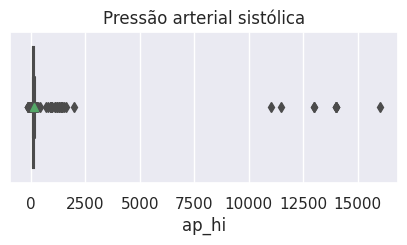

In [ ]:
#boxplot para a coluna '' do dataframe health_data, exibindo informações como quartis,
#mediana e outliers, e também a média dos dados. O boxplot é útil para visualizar 
#a distribuição da pressão arterial sistólica na população do dataframe.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['ap_hi'],showmeans=True).set_title('Pressão arterial sistólica')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


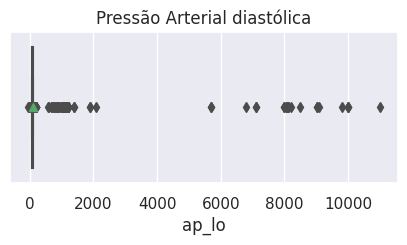

In [ ]:
#boxplot para a coluna '' do dataframe health_data, exibindo informações como quartis,
#mediana e outliers, e também a média dos dados. O boxplot é útil para visualizar 
#a distribuição da pressão arterial sistólica na população do dataframe.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['ap_lo'],showmeans=True).set_title('Pressão Arterial diastólica')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


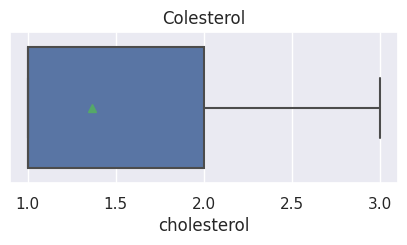

In [ ]:
#boxplot para a coluna '' do dataframe health_data, exibindo informações como quartis,
#mediana e outliers, e também a média dos dados. O boxplot é útil para visualizar 
#a distribuição da pressão arterial sistólica na população do dataframe.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['cholesterol'],showmeans=True).set_title('Colesterol')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


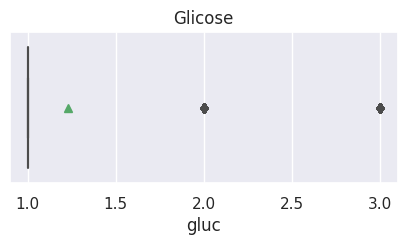

In [ ]:
#boxplot para a coluna '' do dataframe health_data, exibindo informações como quartis,
#mediana e outliers, e também a média dos dados. O boxplot é útil para visualizar 
#a distribuição da pressão arterial sistólica na população do dataframe.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['gluc'],showmeans=True).set_title('Glicose')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


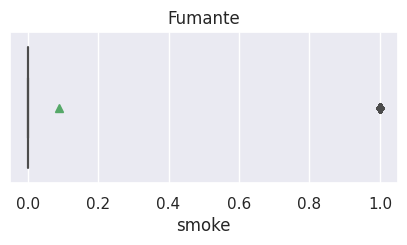

In [ ]:
#boxplot para a coluna '' do dataframe health_data, exibindo informações como quartis,
#mediana e outliers, e também a média dos dados. O boxplot é útil para visualizar 
#a distribuição da pressão arterial sistólica na população do dataframe.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['smoke'],showmeans=True).set_title('Fumante')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


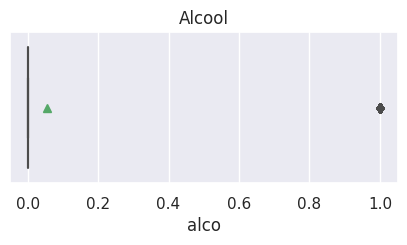

In [ ]:
#boxplot para a coluna '' do dataframe health_data, exibindo informações como quartis,
#mediana e outliers, e também a média dos dados. O boxplot é útil para visualizar 
#a distribuição da pressão arterial sistólica na população do dataframe.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['alco'],showmeans=True).set_title('Alcool')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


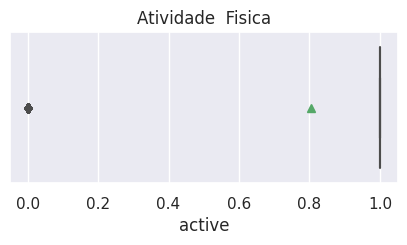

In [ ]:
#boxplot para a coluna '' do dataframe health_data, exibindo informações como quartis,
#mediana e outliers, e também a média dos dados. O boxplot é útil para visualizar 
#a distribuição da pressão arterial sistólica na população do dataframe.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['active'],showmeans=True).set_title('Atividade  Fisica')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


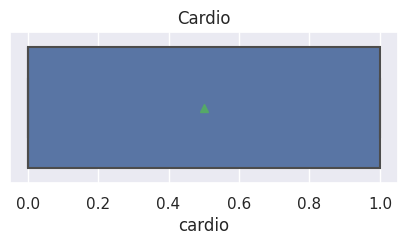

In [ ]:
#boxplot para a coluna '' do dataframe health_data, exibindo informações como quartis,
#mediana e outliers, e também a média dos dados. O boxplot é útil para visualizar 
#a distribuição da pressão arterial sistólica na população do dataframe.
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(health_data['cardio'],showmeans=True).set_title('Cardio')

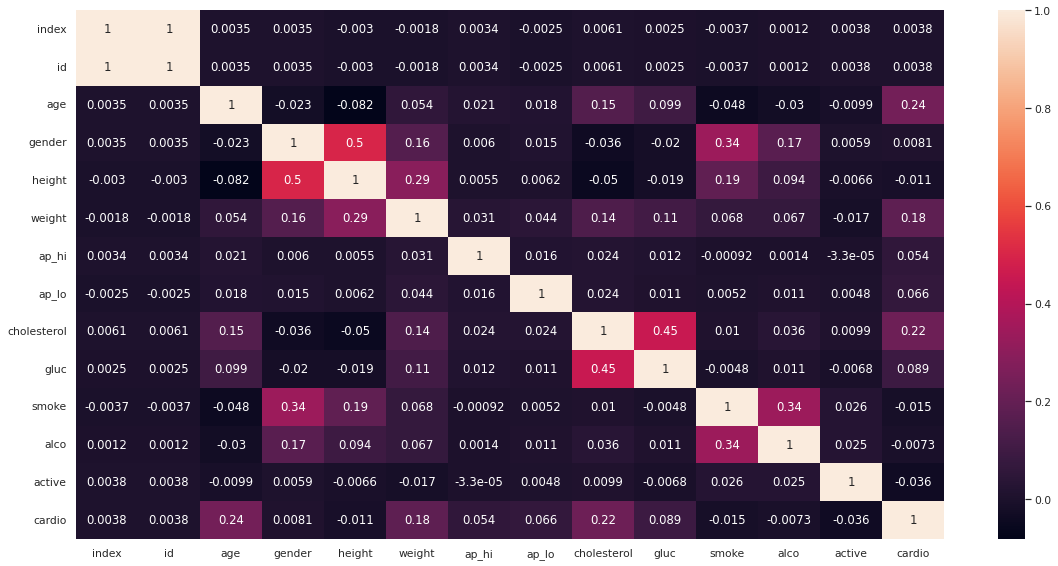

In [ ]:
#mapa de calor que permite visualizar a matriz de correlação entre as variáveis 
#do dataframe health_data. A opção annot=True exibe os valores da matriz no mapa de calor.
plt.figure(figsize=(20,10), dpi=70)
sns.heatmap(health_data.corr(), annot=True);

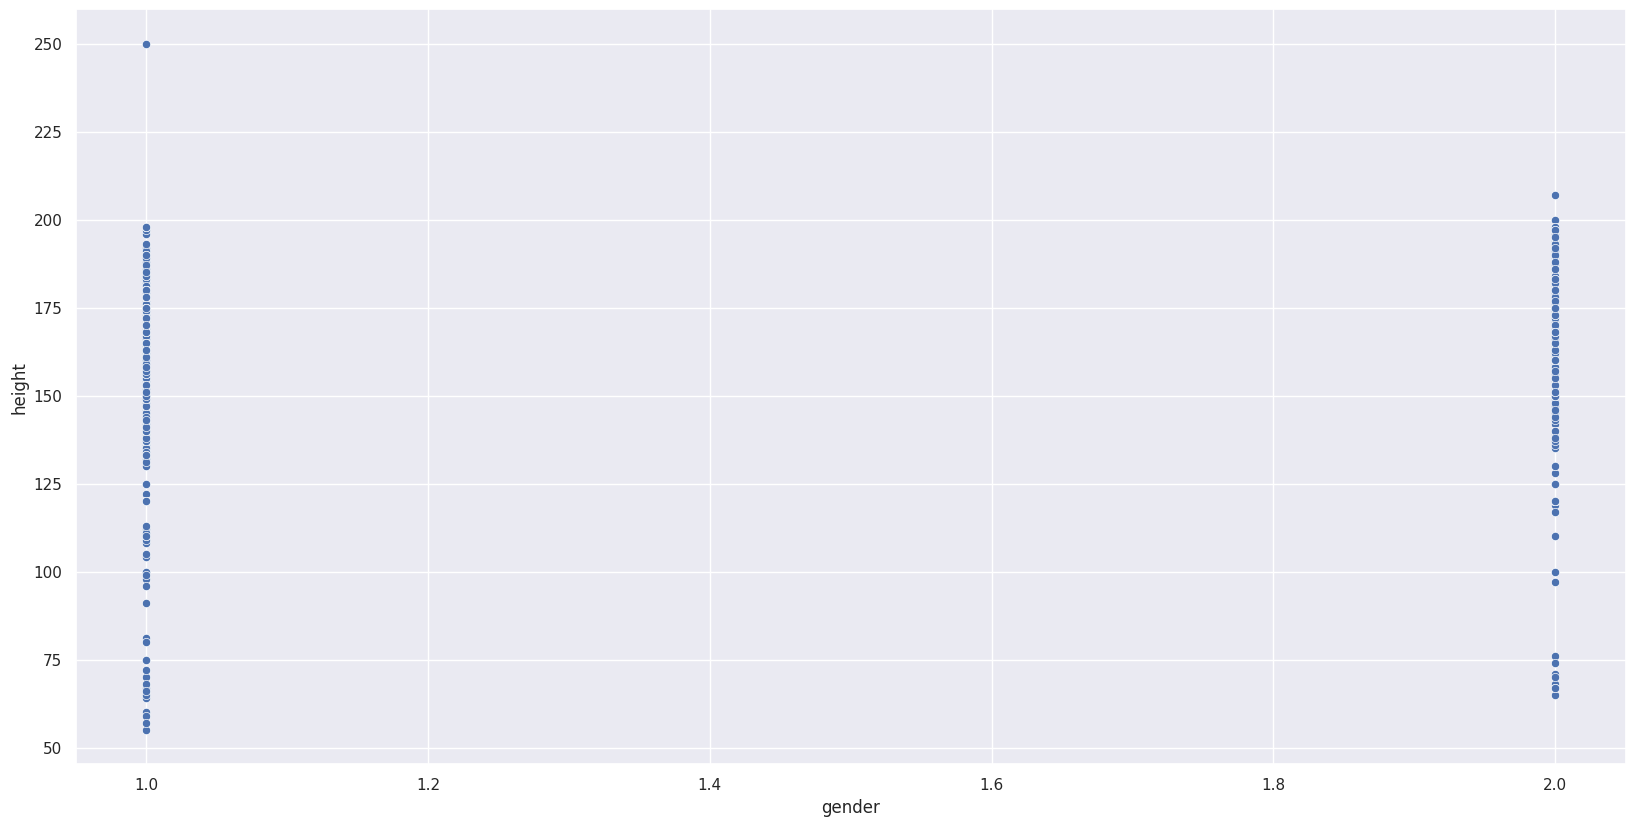

In [ ]:
#gráfico de dispersão que permite visualizar a relação entre as variáveis 'gender' e 'height' do dataframe health_data. O eixo x representa o gênero (0 para feminino e 1 para masculino), enquanto o eixo y representa a altura.
plt.figure(figsize=(20,10),dpi=100)
ax = sns.scatterplot(x='gender', y='height', data=health_data)

Esse gráfico é um scatterplot (gráfico de dispersão) que mostra a relação entre as variáveis 'gender' (gênero) e 'height' (altura) do conjunto de dados 'health_data'.

No eixo x, temos o gênero, onde 1 representa o gênero masculino e 2 representa o gênero feminino. No eixo y, temos a altura em centímetros. Cada ponto no gráfico representa um indivíduo do conjunto de dados, onde a posição do ponto indica sua altura e sua cor indica seu gênero.

Podemos observar que há uma sobreposição significativa entre os pontos masculinos e femininos em relação à altura, mas também há uma tendência clara de que os pontos femininos estão mais agrupados à esquerda do gráfico, o que sugere que, em média, as mulheres são mais baixas do que os homens.

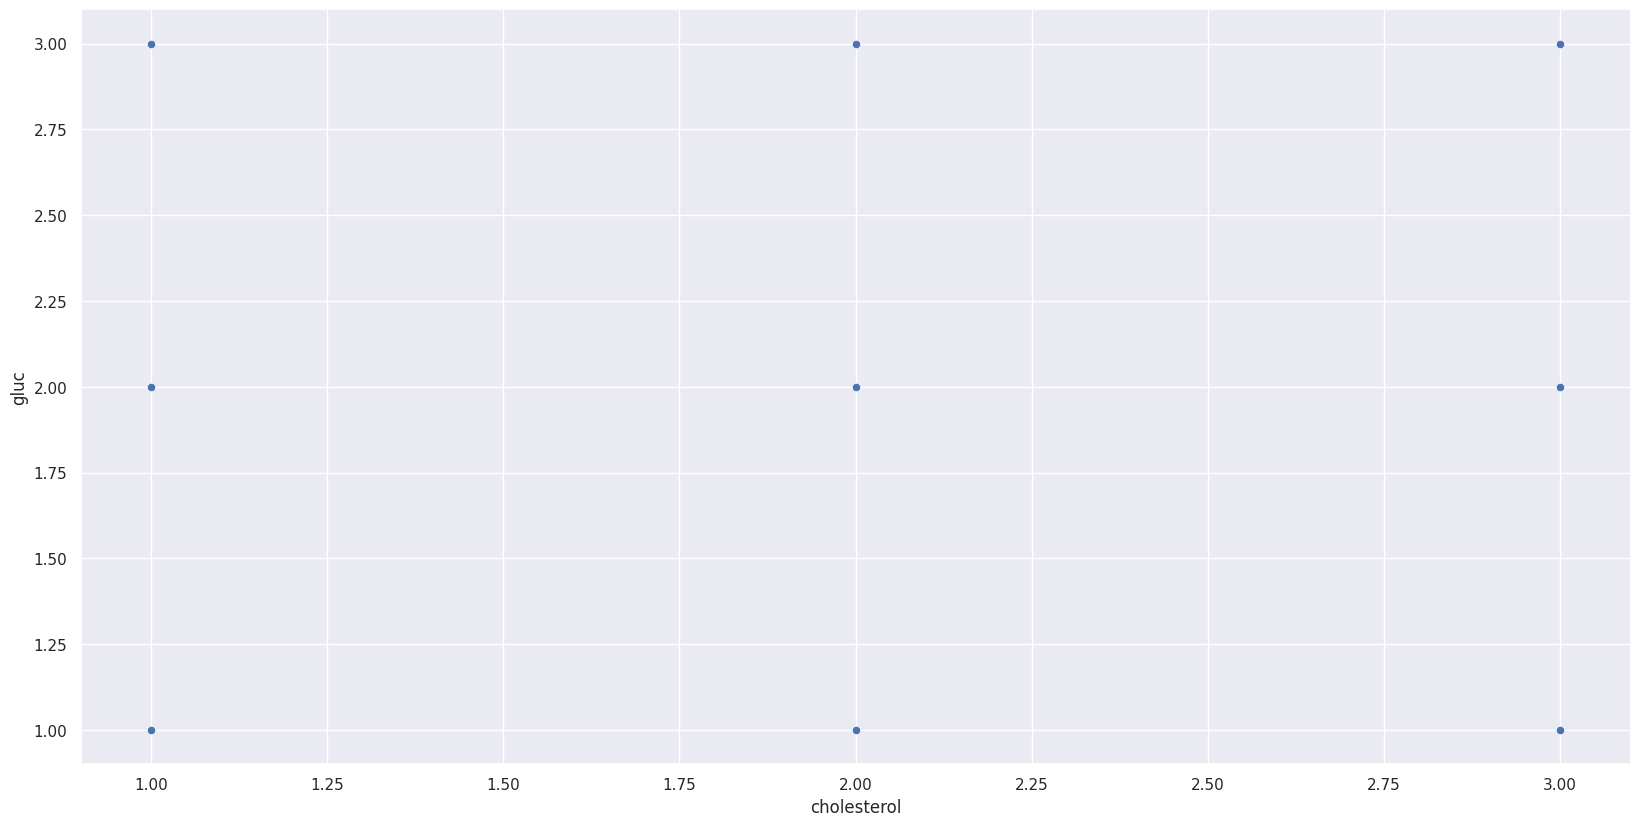

In [ ]:
#Em resumo, o código produz um gráfico de dispersão que permite visualizar a relação
#entre as variáveis 'cholesterol' e 'gluc' do dataframe health_data. O eixo x 
#representa o nível de colesterol, enquanto o eixo y representa o nível de glicose.
plt.figure(figsize=(20,10),dpi=100)
ax = sns.scatterplot(x='cholesterol', y='gluc', data=health_data)

 os eixos x e y correspondem aos níveis de colesterol e glicose, respectivamente, e cada ponto no gráfico representa um indivíduo da amostra.

A cor dos pontos no gráfico indica se o indivíduo tem ou não doença cardiovascular (vermelho para sim e azul para não).

Com base nisso, é possível observar se existe alguma relação entre os níveis de colesterol e glicose e a presença de doença cardiovascular na amostra. Por exemplo, pode-se notar se há uma tendência de que pessoas com níveis mais elevados de colesterol ou glicose tenham uma maior incidência de doença cardiovascular.

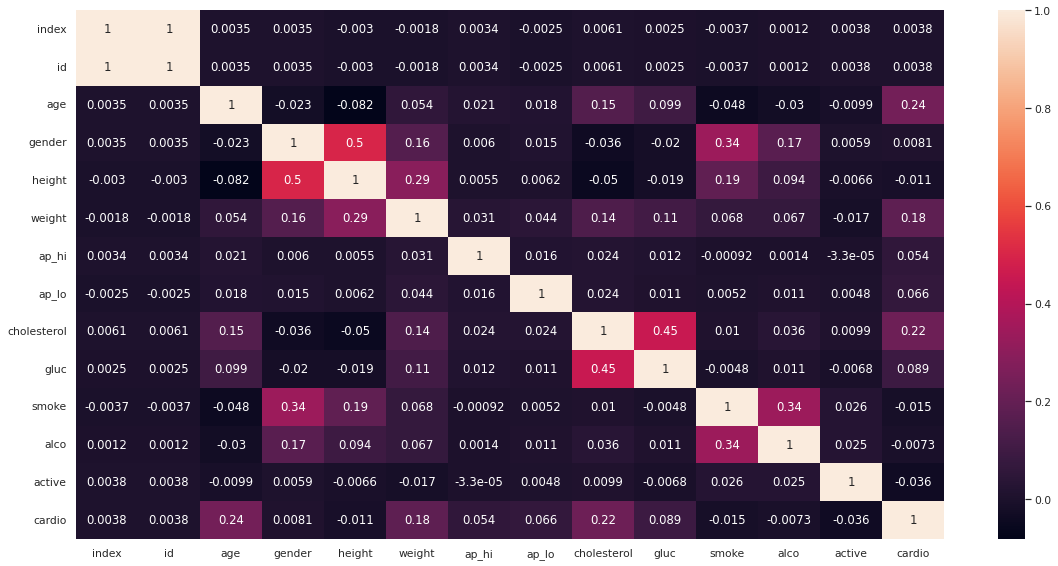

In [ ]:
#verificando se há uma correlação entre os dois graficos 
#mapa de calor que permite visualizar a matriz de correlação entre as variáveis
#numéricas do dataframe health_data. Isso ajuda a identificar quais variáveis estão 
#mais fortemente correlacionadas entre si, o que pode ser útil para selecionar as variáveis mais relevantes para o modelo.


plt.figure(figsize=(20,10), dpi=70)
sns.heatmap(health_data.corr(), annot=True);

# 3° Pré-Processamento dos Dados



In [ ]:
media =sts.mean(health_data['age'])
desv = sts.stdev(health_data['age'])
print(media)
print(desv)

19468.865814285713
2467.251667241401


In [ ]:
#retorna um subconjunto do dataframe health_data que contém apenas as linhas em
#que a idade é menor que a média menos duas vezes o desvio padrão. Isso pode ser 
#útil para remover outliers do dataframe ou para selecionar um subconjunto de dados com base em um critério específico.

health_data.loc[health_data['age'] <  media - 2 * desv]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
14,14,23,14532,2,181,95.0,130,90,1,1,1,1,1,0
25,25,36,14453,1,153,65.0,130,100,2,1,0,0,1,0
53,53,68,14507,1,165,77.0,135,90,3,3,0,0,1,1
106,106,141,14448,2,162,60.0,120,80,2,1,0,0,1,1
107,107,142,14499,2,164,48.0,110,70,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69715,69715,99571,14520,2,158,80.0,160,90,2,2,0,0,1,1
69844,69844,99755,14452,1,165,62.0,120,80,1,1,0,0,0,0
69847,69847,99760,14449,1,168,79.0,120,80,1,1,0,0,0,0
69928,69928,99890,14420,1,160,55.0,140,90,1,1,0,0,1,0


In [ ]:
#retorna um subconjunto do dataframe health_data que contém apenas as linhas em 
#que a idade é maior que a média mais duas vezes o desvio padrão. 
health_data.loc[health_data['age'] > media + 2 * desv]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
#o código ajusta os valores de idade que são considerados outliers (ou valores discrepantes) 
#com base na média e no desvio padrão da idade, substituindo esses valores pela mediana da idade.
mediana = sts.median(health_data['age'])
health_data.loc[health_data['age'] > media + 2 * desv, 'age'] = mediana


In [ ]:
media =sts.mean(health_data['height'])
desv = sts.stdev(health_data['height'])
print(media)
print(desv)

164.35922857142856
8.210126364538036


In [ ]:
#seleciona as linhas do dataframe em que a altura é menor do que um limite inferior 
#definido pela média da altura menos duas vezes o desvio padrão da altura. Isso 
#pode ser usado para filtrar outliers ou valores extremos na coluna de altura.

health_data.loc[health_data['height'] <  media - 2 * desv]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0
249,249,343,18220,1,142,61.0,120,80,1,1,0,0,1,0
360,360,506,19803,1,144,44.0,130,80,1,1,0,0,1,0
383,383,543,19517,1,147,41.0,80,50,1,1,0,0,1,0
391,391,555,18178,1,144,59.0,120,80,2,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69633,69633,99456,18701,2,146,65.0,130,80,1,1,0,0,1,1
69708,69708,99562,21357,1,144,115.0,140,90,1,1,0,1,0,1
69768,69768,99656,19540,1,147,68.0,120,80,1,1,0,0,1,0
69784,69784,99673,17541,1,141,44.0,100,70,1,1,0,0,1,0


In [ ]:
#seleciona as linhas do dataframe em que a altura é menor do que um limite inferior 
#definido pela média da altura menos duas vezes o desvio padrão da altura. Isso pode ser usado para 
#filtrar outliers ou valores extremos na coluna de altura.
mediana = sts.median(health_data['height'])
health_data.loc[health_data['height'] < media -  2 * desv, 'height'] = mediana

In [ ]:
#Essa seleção pode ser usada para identificar valores extremos (outliers) na coluna 
#'height' que estejam acima do limite superior definido pela regra empírica de 95%
#de uma distribuição normal. Esses valores podem ser tratados por meio da substituição 
#por valores centrais, por exemplo, ou por meio de técnicas de normalização ou padronização dos dados.
health_data.loc[health_data['height'] > media + 2 * desv]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
14,14,23,14532,2,181,95.0,130,90,1,1,1,1,1,0
62,62,81,20330,2,187,115.0,130,90,1,1,0,1,1,0
76,76,105,20397,2,188,105.0,120,80,1,1,0,0,1,1
94,94,127,15946,2,185,88.0,133,89,2,3,0,0,1,0
103,103,138,18128,2,183,95.0,125,80,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69887,69887,99820,15241,2,183,84.0,110,80,1,1,0,0,1,1
69913,69913,99862,18748,2,186,101.0,110,80,3,1,0,0,1,0
69975,69975,99963,21264,2,182,100.0,120,80,1,1,0,0,1,1
69981,69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1


In [ ]:
media =sts.mean(health_data['ap_hi'])
desv = sts.stdev(health_data['ap_hi'])
print(media)
print(desv)

128.8172857142857
154.01141945609137


In [ ]:
#Essa seleção pode ser usada para identificar valores extremos (outliers) na coluna
#'ap_hi' que estejam abaixo do limite inferior definido pela regra empírica de 95% 
#de uma distribuição normal. Esses valores podem ser tratados por meio da substituição 
#por valores centrais, por exemplo, ou por meio de técnicas de normalização ou padronização dos dados.

health_data.loc[health_data['ap_hi'] <  media - 2 * desv]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
#Esse código filtra o DataFrame health_data para selecionar apenas as linhas em 
#que o valor da coluna "ap_hi" (pressão arterial sistólica) é maior que a média
#mais duas vezes o desvio padrão. Em outras palavras, ele identifica os valores 
#de pressão arterial sistólica que são considerados outliers e que estão muito distantes da média dos valores.
health_data.loc[health_data['ap_hi'] > media + 2 * desv]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
#substitui os valores de pressão arterial sistólica (coluna "ap_hi") que são considerados outliers, 
#ou seja, valores que estão muito distantes da média dos valores, pela mediana dos valores dessa coluna. 
#A mediana é uma medida de tendência central mais robusta do que a média, que é influenciada por valores extremos. 
#Portanto, essa substituição pode ajudar a reduzir a influência desses valores extremos nos cálculos e análises futuras.
mediana = sts.median(health_data['ap_hi'])
health_data.loc[health_data['ap_hi'] > media +  2 * desv, 'ap_hi'] = mediana

In [ ]:
media =sts.mean(health_data['ap_lo'])
desv = sts.stdev(health_data['ap_lo'])
print(media)
print(desv)

96.63041428571428
188.47253029639026


In [ ]:
#seleciona as linhas da coluna "ap_lo" do dataframe "health_data" que possuem valores
#abaixo de um limite definido como a média menos duas vezes o desvio padrão dos valores
#dessa coluna. Essa seleção retorna um novo dataframe contendo apenas as linhas que atendem a essa condição.
#O objetivo dessa operação pode ser remover outliers ou tratar valores extremos que possam prejudicar a análise dos dados.
health_data.loc[health_data['ap_lo'] <  media - 2 * desv]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
#identifica os valores da coluna 'ap_lo' que estão abaixo de 2 desvios padrões da 
#média e substitui esses valores pela mediana da coluna 'ap_lo'. Isso é feito para 
#lidar com valores discrepantes (outliers) que podem afetar negativamente a análise 
#dos dados e/ou o desempenho de modelos de machine learning. A mediana é geralmente 
#preferida em relação à média nesses casos, pois ela é menos sensível a valores extremos.
mediana = sts.median(health_data['ap_lo'])
health_data.loc[health_data['ap_lo'] < media -  2 * desv, 'ap_lo'] = mediana

In [ ]:
#filtrando as linhas do DataFrame health_data onde a coluna 'ap_lo' possui valores 
#acima de 2 desvios padrão da média. Ou seja, está selecionando as linhas que possuem 
#valores de pressão arterial diastólica anormalmente altos.
health_data.loc[health_data['ap_lo'] > media + 2 * desv]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


In [ ]:
#substitui todos os valores de pressão arterial diastólica (ap_lo) que estiverem 
#acima de dois desvios padrões acima da média pelo valor da mediana.
mediana = sts.median(health_data['ap_lo'])
health_data.loc[health_data['ap_lo'] > media +  2 * desv, 'ap_lo'] = mediana


#Tratando os dados

In [ ]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
health_data.drop(columns='id', axis = 1, inplace=True)

In [ ]:
#Eliminar a coluna de index
health_data.drop(columns='index', axis = 1, inplace=True)

In [ ]:
#Verifica as dimensões do dataset (antes de vírgula são linhas , depois da vírgula são colunas) 
health_data.shape

(70000, 12)

In [ ]:
#Verificando dados duplicados
health_data[health_data.duplicated(keep=False)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1142,17493,2,169,74.0,120,80,1,1,0,0,1,1
1204,16793,1,165,68.0,120,80,1,1,0,0,1,0
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0
1612,20293,1,162,70.0,110,70,1,1,0,0,1,0
2305,20495,1,165,70.0,120,80,1,1,0,0,1,0
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
6325,14552,1,158,64.0,120,80,1,1,0,0,1,0
8190,21778,1,160,58.0,120,80,1,1,0,0,1,0
10494,16937,2,170,70.0,120,80,1,1,0,0,0,0
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0


In [ ]:
#Remove os duplicados
health_data.drop_duplicates(keep='first', inplace=True)


In [ ]:
#Verifica as dimensões do dataset (antes de vírgula são linhas , depois da vírgula são colunas) 
health_data.shape

(69976, 12)

In [ ]:
mediana = sts.median(health_data['height'])
health_data.loc[health_data['height'] > media +  2 * desv, 'height'] = mediana

Kurtosis:  0.02769682496639625


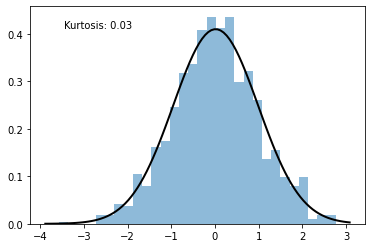

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis

# Gerando uma distribuição aleatória com kurtosis negativo
np.random.seed(1234)
x = np.random.normal(size=1000)
x[0:5] # Visualizando as primeiras 5 amostras

# Calculando a kurtosis da distribuição
kurt = kurtosis(x)
print("Kurtosis: ", kurt)

# Criando um histograma da distribuição
plt.hist(x, bins=30, density=True, alpha=0.5)

# Adicionando uma curva de distribuição normal com média e desvio padrão da amostra
mu, std = norm.fit(x)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)
plt.plot(x_axis, p, 'k', linewidth=2)

# Adicionando texto para mostrar a kurtosis na figura
plt.text(0.1, 0.9, f"Kurtosis: {kurt:.2f}", transform=plt.gca().transAxes)

plt.show()

In [ ]:
X = health_data.drop('cardio', axis=1)
y = health_data['cardio']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69971,0.653659,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0
69972,0.913899,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0
69973,0.640186,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0
69974,0.900736,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0


#4° Construindo a Máquina Preditiva e 5° Avaliação do modelo

## **Treino do DecisionTreeClassifier**

In [ ]:
health_data1 = health_data

In [ ]:
y = health_data1.cardio

X = health_data1[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active']]

In [ ]:

#from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar.
#Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
# dividir os dados em conjuntos de treinamento e validação

#70% teste 30% validação

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42)

# verificar o tamanho dos conjuntos
print(f"Tamanho do conjunto de treinamento: {len(train_X)}")
print(f"Tamanho do conjunto de validação: {len(val_X)}")

# criar uma instância do modelo
health_data1 = DecisionTreeClassifier()

# Treina o modelo no conjunto de treino
health_data1.fit(train_X, train_y)



Tamanho do conjunto de treinamento: 48983
Tamanho do conjunto de validação: 20993


DecisionTreeClassifier()

In [ ]:
print(len(train_X))
print(len(val_y))

48983
20993


In [ ]:
train_X.shape, val_X.shape

((48983, 11), (20993, 11))

In [ ]:
print(y)

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 69976, dtype: int64


In [ ]:
#meu X originalmente tem 70 mil linhas e 13 coluns
X.shape 

(69976, 11)

In [ ]:
#meus dados de treino tem 48982 linhas e os de previsao 20993
train_X.shape, val_X.shape

((48983, 11), (20993, 11))

In [ ]:
#Avalia o modelo com os dados de teste
health_data1.score(val_X,val_y)
0.8953498803827751

0.8953498803827751

In [ ]:
#Cross Validation. A validação cruzada é uma técnica para avaliar a capacidade de 
#generalização de um modelo a partir de um conjunto de dados.

cv_scores = cross_val_score(health_data1, X, y, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.62839383 0.6410861  0.63294034 0.62993926 0.62750982]
Média dos Scores = 0.6319738707563157


Previsões para os dados de validação

In [ ]:
#Obtenção das previsões

val_predictions_DC = health_data1.predict(val_X)
val_predictions_DC

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
#seleciono as 10 primeiras previsões
print("Previsões", val_predictions_DC[:10])
print("Target   ", val_y[:10].values)

Previsões [1 0 1 0 1 1 1 0 0 0]
Target    [1 0 1 0 1 1 0 0 0 1]


In [ ]:
#meus dados de treino tem 48982 linhas e os de previsao 20993
train_X.shape, val_X.shape

((48983, 11), (20993, 11))

**Avaliação do modelo DecisionTreeClassifier**

In [ ]:
# Calcula a matriz de confusão
cm = confusion_matrix(val_y, val_predictions_DC)
print(cm)

[[6698 3745]
 [3771 6779]]


Acurácia


In [ ]:
#Avaliar a precisão do modelo:
#faz a previsao baseado no codigo de previsao la acima:
#usando os dados novos de validação
#val_predictions = health_model.predict(val_X) 
accuracy = accuracy_score(val_y, [round(prediction) for prediction in val_predictions_DC])
auc_roc = roc_auc_score(val_y, val_predictions_DC)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('AUC-ROC: %.2f%%' % (auc_roc * 100.0))

Accuracy: 64.20%
AUC-ROC: 64.20%


In [ ]:
print("Número de amostras em val_y:", len(val_y))
print("Número de amostras em val_predictions:", len(val_predictions_DC))


Número de amostras em val_y: 20993
Número de amostras em val_predictions: 20993


Matriz de Confusão

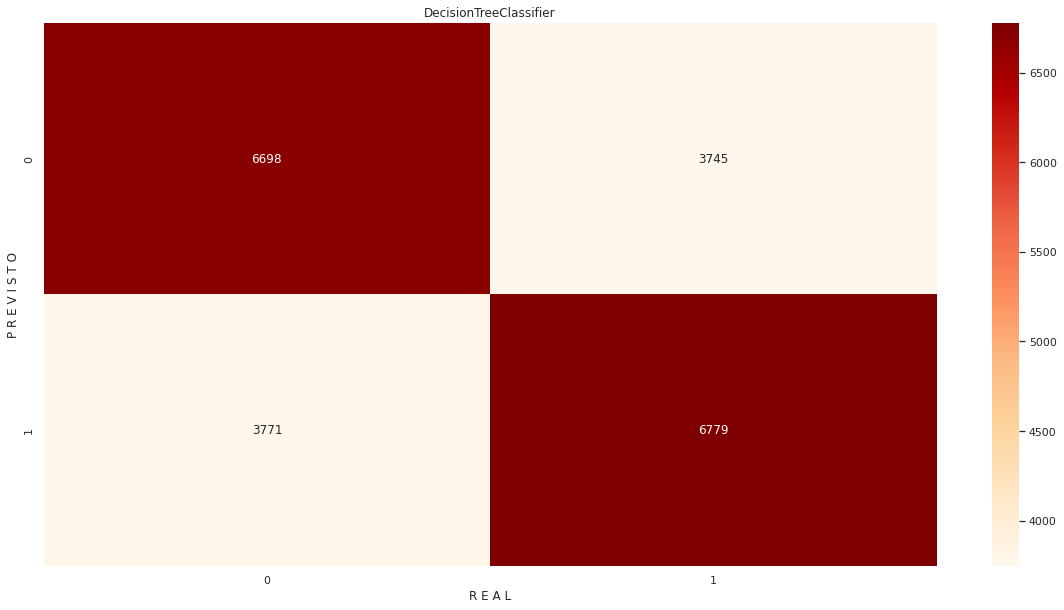

In [ ]:
#superior esquerda=modelo previu que a amostra não pertencia à classe positiva (1) e estava correto
#superior direita=modelo previu que a amostra pertencia à classe positiva(1),mas estava incorreto
#inferior esquerda=modelo previu que a amostra não pertencia à classe positiva(1),mas estava incorreto.
#inferior direita=modelo previu que a amostra pertencia à classe positiva (1) e estava correto.

# correto(amostra nao pert. classe positiva) , incorreto(pertencia)
#incorreto(amostra não pertencia), correto(amostra pertencia)


# Cria a matriz de confusão
conf_matrix = confusion_matrix(val_y, val_predictions_DC)

# Plot a matriz de confusão
sns.heatmap(conf_matrix, cmap='OrRd', annot=True, fmt='2.0f')
plt.title('DecisionTreeClassifier')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
print(confusion_matrix(val_y,val_predictions_DC))
print(pd.crosstab(val_y,val_predictions_DC,rownames=['Real'],colnames=['Predito'],margins=
True))


[[6698 3745]
 [3771 6779]]
Predito      0      1    All
Real                        
0         6698   3745  10443
1         3771   6779  10550
All      10469  10524  20993


Matriz de Confusão

In [ ]:
from sklearn.metrics import (accuracy_score, cohen_kappa_score, precision_score, recall_score, 
f1_score, roc_auc_score, roc_curve, auc, r2_score, classification_report)

# Converter as variáveis em formato inteiro
val_y = val_y.astype(int)
val_predictions_DC = val_predictions_DC.astype(int)

# Calcular as métricas
acuracia = accuracy_score(val_y, val_predictions_DC)
precisao = precision_score(val_y, val_predictions_DC)
recall = recall_score(val_y, val_predictions_DC)
f1Score = f1_score(val_y, val_predictions_DC)
xgb_curva_roc = roc_auc_score(val_y, val_predictions_DC)
kappa = cohen_kappa_score(val_y, val_predictions_DC)

# Imprimir as métricas
print(f'Acurácia: {round(acuracia, 2)}')
print(f'Precisão: {round(precisao, 2)}')
print(f'Recall ou Sensibilidade: {round(recall, 2)}')
print(f'F1-Score: {round(f1Score, 2)}')
print(f'Kappa: {round(kappa, 2)}')
print(f'Curva ROC: {round(xgb_curva_roc, 2)}')

Acurácia: 0.64
Precisão: 0.64
Recall ou Sensibilidade: 0.64
F1-Score: 0.64
Kappa: 0.28
Curva ROC: 0.64


## **Treino do XGBoost**

XGBoost (Extreme Gradient Boosting) é uma biblioteca de código aberto de aprendizado de máquina baseada em árvores de decisão, que tem se mostrado muito eficaz em muitas aplicações de ciência de dados, incluindo problemas de classificação, regressão e ranqueamento.

XGBoost usa uma técnica de boosting, que é uma técnica de aprendizado de máquina que combina vários modelos simples para criar um modelo mais forte. Ele cria um conjunto de árvores de decisão e, em cada etapa, ajusta o modelo para minimizar o erro residual dos dados, melhorando assim a precisão do modelo. Além disso, XGBoost inclui algumas técnicas avançadas de regularização que ajudam a evitar overfitting, que ocorre quando o modelo se ajusta demais aos dados de treinamento e não generaliza bem para dados novos.

Nesse momento iremos iniciar o treino do modelo

In [ ]:
health_data2 = health_data

In [ ]:
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
# Instalar o pacote
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y = health_data2.cardio

#features =['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active']
X = health_data2[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active']]

In [ ]:
#Importando
import xgboost as xgb

In [ ]:
#cria um objeto da classe XGBClassifier do pacote XGBoost e o atribui à variável chamada "xgb". 
#O parâmetro "random_state" é usado para definir uma semente aleatória que será usada para inicializar o gerador de números aleatórios
#interno do XGBoost. Para garantir que os resultados produzidos pelo modelo sejam 
#reproduzíveis e consistentes em diferentes execuções do código. Ao fornecer o mesmo valor de semente aleatória, 
#o modelo resultante será o mesmo toda vez que for executado. Isso é importante para garantir a consistência e a confiabilidade do modelo.


xgb = xgb.XGBClassifier(random_state=42) 

In [ ]:
#Vamos separar em treino e teste
#Obs: random_state deixa os valores aleatírios dentro de um range
#Eu posso usar 3,5,6, qualquer número inteiro que dentro de um range eu pego um sequencia de valores

#70% teste 30% validação

train_X, val_X, train_y, val_y = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
xgb.fit(train_X,train_y,early_stopping_rounds=10,eval_set=[(val_X, val_y)])

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.62382
[1]	validation_0-logloss:0.58750
[2]	validation_0-logloss:0.56777
[3]	validation_0-logloss:0.55657
[4]	validation_0-logloss:0.55030
[5]	validation_0-logloss:0.54631
[6]	validation_0-logloss:0.54446
[7]	validation_0-logloss:0.54304
[8]	validation_0-logloss:0.54229
[9]	validation_0-logloss:0.54183
[10]	validation_0-logloss:0.54166
[11]	validation_0-logloss:0.54163
[12]	validation_0-logloss:0.54162
[13]	validation_0-logloss:0.54169
[14]	validation_0-logloss:0.54169
[15]	validation_0-logloss:0.54162
[16]	validation_0-logloss:0.54157
[17]	validation_0-logloss:0.54173
[18]	validation_0-logloss:0.54171
[19]	validation_0-logloss:0.54189
[20]	validation_0-logloss:0.54209
[21]	validation_0-logloss:0.54208
[22]	validation_0-logloss:0.54194
[23]	validation_0-logloss:0.54207
[24]	validation_0-logloss:0.54216
[25]	validation_0-logloss:0.54225
[26]	validation_0-logloss:0.54232


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
val_X_scaled = sc.transform(val_X)

In [ ]:
#Calcula a acuracia

#A acurácia é uma medida de desempenho comum para modelos de classificação e 
#representa a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões feitas. 
#O valor retornado pela função "score" é um número entre 0 e 1, onde um valor mais próximo de 1 indica uma 
#melhor performance do modelo na tarefa de classificação.

xgb.score(val_X, val_y) 

0.7347210975086934

In [ ]:
#Obter a previsões
val_predictions_xgb = xgb.predict(val_X)
val_predictions_xgb 

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
val_predictions_prob = xgb.predict_proba(val_X)
val_predictions_prob

array([[0.1332128 , 0.8667872 ],
       [0.8819795 , 0.11802047],
       [0.28449613, 0.7155039 ],
       ...,
       [0.7381789 , 0.2618211 ],
       [0.52633166, 0.47366837],
       [0.6156148 , 0.38438523]], dtype=float32)

In [ ]:
#meu X originalmente tem 70 mil linhas e 10 coluns
X.shape 

(69976, 11)

In [ ]:
#meus dados de treino tem 48983 linhas e os de previsao 20993
train_X.shape, val_X.shape

((48983, 11), (20993, 11))

In [ ]:
print("Número de amostras em val_y:", len(val_y))
print("Número de amostras em val_predictions:", len(val_predictions_xgb))

Número de amostras em val_y: 20993
Número de amostras em val_predictions: 20993


**Avaliação do modelo XGBoost**

calculando Acuracia:


In [ ]:
#Avaliar a precisão do modelo:
accuracy = accuracy_score(val_y, [round(prediction) for prediction in val_predictions_xgb ])
auc_roc = roc_auc_score(val_y, val_predictions_xgb )
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('AUC-ROC: %.2f%%' % (auc_roc * 100.0))


Accuracy: 73.47%
AUC-ROC: 73.49%


Vemos que a curacia deu aproximadamente 73% proximo de 100 o que significa melhor desempenho

Para avaliar o desempenho do modelo XGBoost após treiná-lo, você pode usar uma variedade de métricas, dependendo do tipo de problema que você está tentando resolver. Alguns exemplos comuns incluem precisão (accuracy), recall, precisão, área sob a curva ROC (AUC-ROC) e erro quadrático médio (MSE).

Aqui está um exemplo de código em Python para calcular a precisão e a AUC-ROC para um modelo XGBoost treinado:


Matriz de Confusão

In [ ]:
#declaração de biblioteca da matriz de confusão
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)

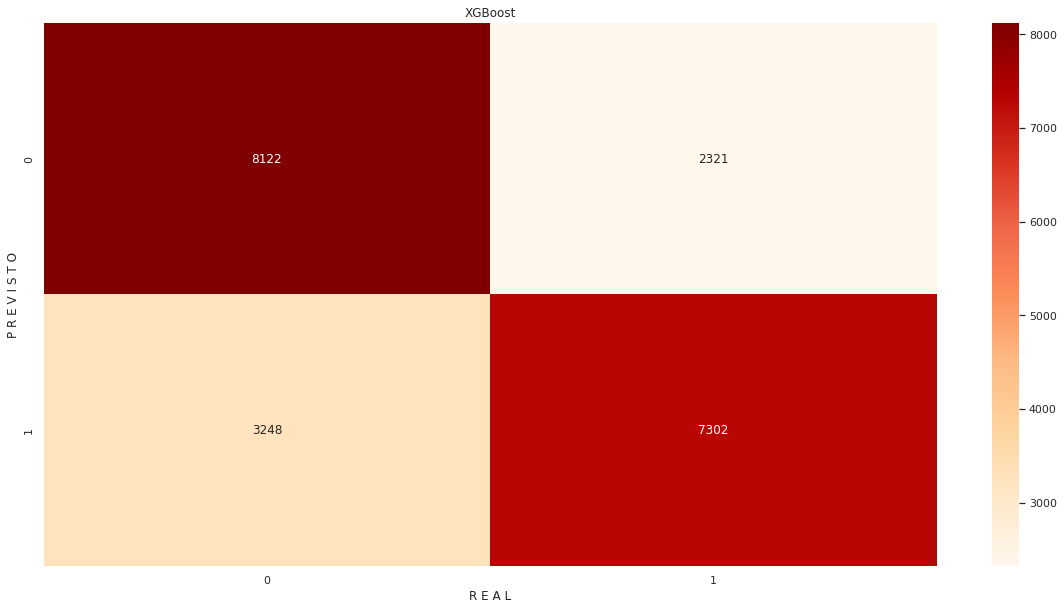

In [ ]:
#superior esquerda=modelo previu que a amostra não pertencia à classe positiva (1) e estava correto
#superior direita=modelo previu que a amostra pertencia à classe positiva(1),mas estava incorreto
#inferior esquerda=modelo previu que a amostra não pertencia à classe positiva(1),mas estava incorreto.
#inferior direita=modelo previu que a amostra pertencia à classe positiva (1) e estava correto.

# correto(amostra nao pert. classe positiva) , incorreto(pertencia)
#incorreto(amostra não pertencia), correto(amostra pertencia)


sns.heatmap(confusion_matrix(val_y,val_predictions_xgb), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('XGBoost')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
from sklearn.metrics import (cohen_kappa_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
acuracia = accuracy_score(val_y,val_predictions_xgb)
precisao = precision_score(val_y,val_predictions_xgb)
recall = recall_score(val_y,val_predictions_xgb)
f1Score = f1_score(val_y,val_predictions_xgb)
xgb_curva_roc = roc_auc_score(val_y,val_predictions_xgb)
kappa = cohen_kappa_score(val_y,val_predictions_xgb)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.73
Precisão:0.76
Recall ou Sensibilidade:0.69
F1-Score:0.72
Kappa:0.47
Curva ROC:0.73


# **Treino SVM**

In [ ]:
#copia da base de dados
health_data3 = health_data

In [ ]:
y = health_data3.cardio

X = health_data3[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
#Uma instância do modelo SVM é criada com o parâmetro random_state definido como 42 e o parâmetro probability 

#O parâmetro "probability" faz com que o modelo calcule probabilidades para cada classe. 
# Por ser saida binária, recomenda-se definir esse parâmetro como False.
svc = SVC(random_state=42, probability=False)

In [ ]:
# Dividir o conjunto de dados em treino e validação
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo SVM com parâmetros ajustados
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', 
          degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=42, 
          shrinking=True, tol=0.001, verbose=False)

# Treinar o modelo apenas com os dados de treinamento
svc.fit(train_X, train_y)

# Avaliar o modelo nos dados de validação
score = svc.score(val_X, val_y)
print("Score do modelo nos dados de validação:", score)

Score do modelo nos dados de validação: 0.5746677463916544


Melhorando a previsão: 70% treino, 30% teste

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# Dividir o conjunto de dados em treino e validação
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
val_X = scaler.transform(val_X)

# Criar o modelo SVM com parâmetros ajustados
svc = SVC(kernel='rbf', random_state=42)

# Ajustar os hiperparâmetros usando busca de grade
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(train_X, train_y)
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

# Treinar o modelo com os melhores hiperparâmetros encontrados
svc = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], random_state=42)
svc.fit(train_X, train_y)

# Avaliar o modelo nos dados de validação
score = svc.score(val_X, val_y)
print("Score do modelo nos dados de validação:", score)


Melhores hiperparâmetros encontrados: {'C': 10, 'gamma': 0.1}
Score do modelo nos dados de validação: 0.7291954461010813


Acima foi adicionado a normalização dos dados usando a classe StandardScaler do Scikit-learn. Isso garante que os dados tenham uma média zero e uma variação unitária, o que pode melhorar a performance do modelo.Em seguida, ajustamos os hiperparâmetros do modelo usando a busca de grade (GridSearchCV), que testa várias combinações de hiperparâmetros e retorna os melhores valores. Aqui, testamos os valores de "C" e "gamma" no intervalo [0.1, 1, 10].

Por fim, treinamos o modelo com os melhores hiperparâmetros encontrados e avaliamos sua performance nos dados de validação.


O objetivo é comparar o desempenho de dois modelos SVM treinados com os mesmos dados de treinamento e os mesmos dados de teste, mas com diferentes configurações de parâmetros.

In [ ]:
#Obter a previsões
val_predictions_svm = svc.predict(val_X)
val_predictions_svm

array([1, 0, 1, ..., 0, 0, 0])

**Avaliação do modelo SVM**

In [ ]:
#Avaliar a precisão do modelo:
accuracy = accuracy_score(val_y, [round(prediction) for prediction in val_predictions_svm])
auc_roc = roc_auc_score(val_y, val_predictions_svm)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('AUC-ROC: %.2f%%' % (auc_roc * 100.0))

Accuracy: 72.92%
AUC-ROC: 72.93%


Matriz de Confusão

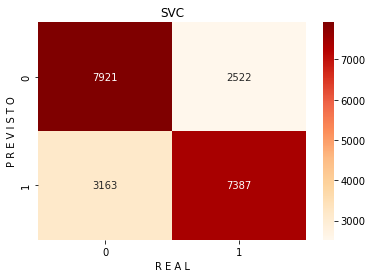

In [ ]:
#superior esquerda=modelo previu que a amostra não pertencia à classe positiva (1) e estava correto
#superior direita=modelo previu que a amostra pertencia à classe positiva(1),mas estava incorreto
#inferior esquerda=modelo previu que a amostra não pertencia à classe positiva(1),mas estava incorreto.
#inferior direita=modelo previu que a amostra pertencia à classe positiva (1) e estava correto.

# correto(amostra nao pert. classe positiva) , incorreto(pertencia)
#incorreto(amostra não pertencia), correto(amostra pertencia)


sns.heatmap(confusion_matrix(val_y, val_predictions_svm), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
from sklearn.metrics import (cohen_kappa_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
acuracia = accuracy_score(val_y,val_predictions_svm)
precisao = precision_score(val_y,val_predictions_svm)
recall = recall_score(val_y,val_predictions_svm)
f1Score = f1_score(val_y,val_predictions_svm)
xgb_curva_roc = roc_auc_score(val_y,val_predictions_svm)
kappa = cohen_kappa_score(val_y,val_predictions_svm)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.73
Precisão:0.75
Recall ou Sensibilidade:0.7
F1-Score:0.72
Kappa:0.46
Curva ROC:0.73


In [ ]:
print(classification_report(val_y, svc.predict(val_X)))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74     10443
           1       0.75      0.70      0.72     10550

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.73     20993
weighted avg       0.73      0.73      0.73     20993



## **Treino do Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#copia da base de dados
health_data4 = health_data

In [ ]:
y = health_data.cardio

X = health_data[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active']]

In [ ]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar.
#Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.3,random_state = 42)
print(len(train_X))
print(len(val_y))


48983
20993


In [ ]:
#Realizando a parte de pré-processamento no conjunto de treinamento, teste e ajustar a escala
#padrão.
sc = StandardScaler()
train_X= sc.fit_transform(train_X)
val_X = sc.transform(val_X)

In [ ]:
#Criação do modelo, treinamento,
#n_estimators = 10, vou gerar 10 classificadores de árvore de decisão.
health_data4= RandomForestClassifier(n_estimators = 10)
health_data4.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10)

In [ ]:
#Avalia o modelo com os dados de teste
health_data4.score(val_X, val_y)


0.6958033630257705

In [ ]:
#Cross Validation. A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo a partir de um conjunto de dados.
cv_scores = cross_val_score(health_data4, X, y, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')


Scores = [0.70284367 0.70796713 0.70310825 0.69910682 0.6933905 ]
Média dos Scores = 0.7012832748314453


In [ ]:
val_predictions_rf = health_data4.predict(val_X)
val_predictions_rf

array([1, 0, 1, ..., 0, 0, 0])

**Avaliação do modelo Random Forest**

In [ ]:
#Avaliar a precisão do modelo:
accuracy = accuracy_score(val_y, [round(prediction) for prediction in val_predictions_rf])
auc_roc = roc_auc_score(val_y, val_predictions_rf)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('AUC-ROC: %.2f%%' % (auc_roc * 100.0))

Accuracy: 69.58%
AUC-ROC: 69.61%


Matriz de Confusão

In [ ]:
print(confusion_matrix(val_y,val_predictions_rf))
print(pd.crosstab(val_y,val_predictions_rf,rownames=['Real'],colnames=['Predito'],margins= True))


[[7780 2663]
 [3723 6827]]
Predito      0     1    All
Real                       
0         7780  2663  10443
1         3723  6827  10550
All      11503  9490  20993


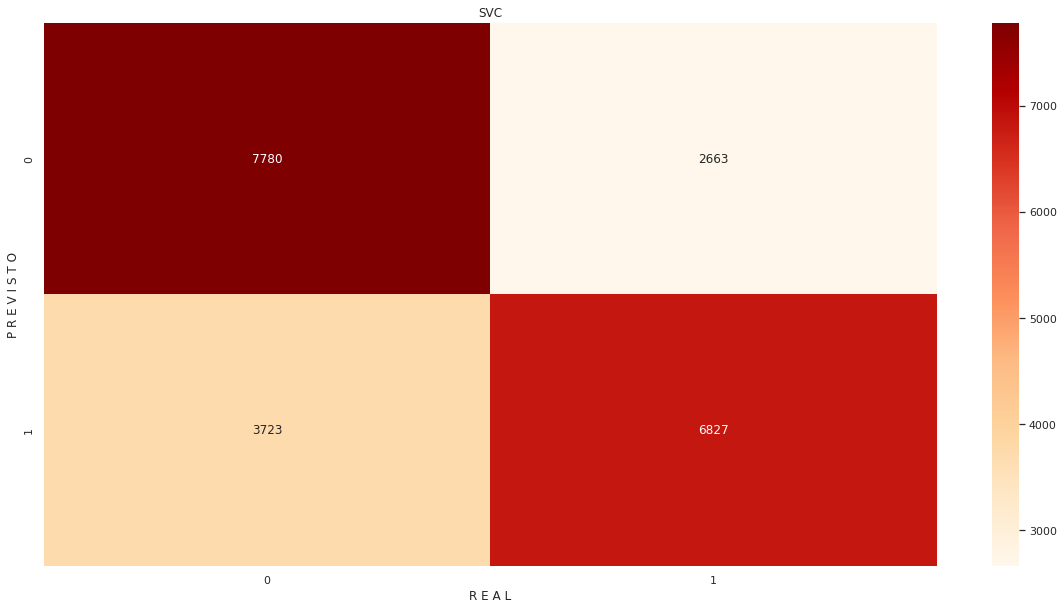

In [ ]:
#superior esquerda=modelo previu que a amostra não pertencia à classe positiva (1) e estava correto
#superior direita=modelo previu que a amostra pertencia à classe positiva(1),mas estava incorreto
#inferior esquerda=modelo previu que a amostra não pertencia à classe positiva(1),mas estava incorreto.
#inferior direita=modelo previu que a amostra pertencia à classe positiva (1) e estava correto.

# correto(amostra nao pert. classe positiva) , incorreto(pertencia)
#incorreto(amostra não pertencia), correto(amostra pertencia)


sns.heatmap(confusion_matrix(val_y, val_predictions_rf), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
from sklearn.metrics import (cohen_kappa_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
acuracia = accuracy_score(val_y,val_predictions_rf)
precisao = precision_score(val_y,val_predictions_rf)
recall = recall_score(val_y,val_predictions_rf)
f1Score = f1_score(val_y,val_predictions_rf)
xgb_curva_roc = roc_auc_score(val_y,val_predictions_rf)
kappa = cohen_kappa_score(val_y,val_predictions_rf)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.7
Precisão:0.72
Recall ou Sensibilidade:0.65
F1-Score:0.68
Kappa:0.39
Curva ROC:0.7


## **Treino do Gradient Boosting**

In [ ]:
#copia da base de dados
health_data5 = health_data

In [ ]:
y = health_data5.cardio
X = health_data5[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active']]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar.
#Random_state = 42 para sempre obter a mesma divisão da base quando o código for executado
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(train_X))
print(len(val_X))

48983
20993


In [ ]:
#Realizando a parte de pré-processamento no conjunto de treinamento, teste e ajustar a escala
#padrão.
sc = StandardScaler()
train_X= sc.fit_transform(train_X)
val_X = sc.transform(val_X)

In [ ]:
#Criação do modelo, treinamento
health_data5 = GradientBoostingClassifier()
health_data5.fit(train_X, train_y)

GradientBoostingClassifier()

In [ ]:
#Obtenção das previsões
val_predictions = health_data5.predict(val_X)
val_predictions

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
#Avalia o modelo com os dados de teste
#resultado da avaliação do modelo, que é a acurácia.
health_data5.score(val_X,val_y)



0.7348640022864764

*Melhorando o modelo*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Carregue os dados
health_data5 = '/content/drive/MyDrive/kaggle/heart_data.csv'
health_data5 = pd.read_csv('/content/drive/MyDrive/kaggle/heart_data.csv')


# Pré-processamento dos dados
X = health_data5.drop(columns=['cardio'])
y = health_data5['cardio']
sc = StandardScaler()
X = sc.fit_transform(X)

# Divida-os em conjuntos de treinamento e validação
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir um classificador com GradientBoosting
clf = GradientBoostingClassifier()

# Definir uma grade de hiperparâmetros a serem ajustados
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar busca em grade com validação cruzada de 5 dobras-------
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_X, train_y)

# Obter o melhor modelo e imprimir seus parâmetros
best_model = grid_search.best_estimator_
print("Melhores parâmetros do modelo:", grid_search.best_params_)

# Use o modelo para prever o conjunto de validação
val_y_pred = best_model.predict(val_X)

# Avaliar o desempenho do modelo no conjunto de validação
accuracy = accuracy_score(val_y, val_y_pred)
print("Acurácia no conjunto de validação:", accuracy)


Melhores parâmetros do modelo: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Acurácia no conjunto de validação: 0.7392857142857143


**Avaliação do modelo Gradient Boosting**

Matriz de Confusão

In [ ]:
#Visualização da matriz de confusão
print(confusion_matrix(val_y,val_predictions))
print(pd.crosstab(val_y,val_predictions,rownames=['Real'],colnames=['Predito'],margins=
True))

[[8073 2370]
 [3196 7354]]
Predito      0     1    All
Real                       
0         8073  2370  10443
1         3196  7354  10550
All      11269  9724  20993


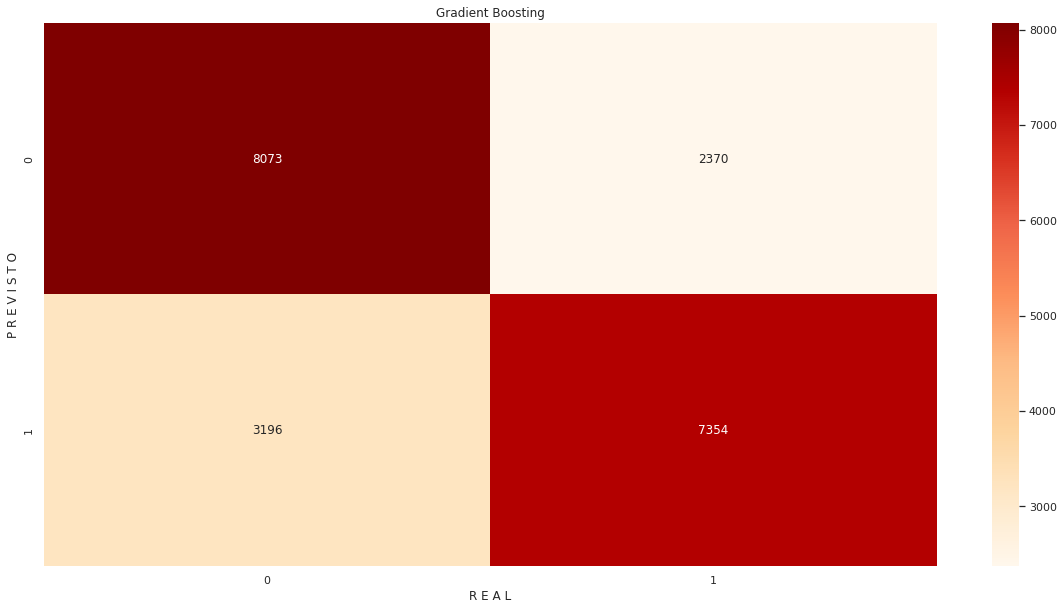

In [ ]:
#superior esquerda=modelo previu que a amostra não pertencia à classe positiva (1) e estava correto
#superior direita=modelo previu que a amostra pertencia à classe positiva(1),mas estava incorreto
#inferior esquerda=modelo previu que a amostra não pertencia à classe positiva(1),mas estava incorreto.
#inferior direita=modelo previu que a amostra pertencia à classe positiva (1) e estava correto.

# correto(amostra nao pert. classe positiva) , incorreto(pertencia)
#incorreto(amostra não pertencia), correto(amostra pertencia)

#1° ACURACIA
sns.heatmap(confusion_matrix(val_y, val_predictions), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Gradient Boosting')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Gerando o vetor para ser usado no gráfico de barras e radar plot

def converteVetor(m):
    vetor = []
    for i in range(len(m)):
        for j in range(len(m[i])):
            vetor.append(m[i][j])
    return vetor



gradient_vetor = converteVetor(confusion_matrix(val_y,val_y_pred))
gradient_vetor
[81263, 19065, 7764, 92548]


[81263, 19065, 7764, 92548]

In [ ]:
#1° Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
from sklearn.metrics import (cohen_kappa_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
acuracia = accuracy_score(val_y,val_predictions)
precisao = precision_score(val_y,val_predictions)
recall = recall_score(val_y,val_predictions)
f1Score = f1_score(val_y,val_predictions)
xgb_curva_roc = roc_auc_score(val_y,val_predictions)
kappa = cohen_kappa_score(val_y,val_predictions)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.73
Precisão:0.76
Recall ou Sensibilidade:0.7
F1-Score:0.73
Kappa:0.47
Curva ROC:0.74


**Novo teste**

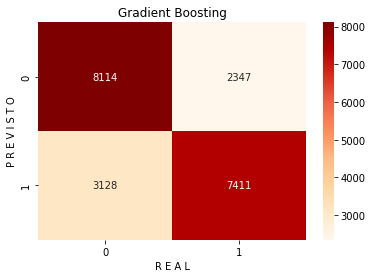

In [ ]:
sns.heatmap(confusion_matrix(val_y, val_y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Gradient Boosting')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
from sklearn.metrics import (cohen_kappa_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
acuracia = accuracy_score(val_y,val_y_pred)
precisao = precision_score(val_y,val_y_pred)
recall = recall_score(val_y,val_y_pred)
f1Score = f1_score(val_y,val_y_pred)
xgb_curva_roc = roc_auc_score(val_y,val_y_pred)
kappa = cohen_kappa_score(val_y,val_y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.74
Precisão:0.76
Recall ou Sensibilidade:0.7
F1-Score:0.73
Kappa:0.48
Curva ROC:0.74


Não é possível afirmar com certeza qual modelo é o melhor com base apenas nas métricas de avaliação apresentadas. A escolha do melhor modelo depende do objetivo específico do problema e das características dos dados.

No entanto, podemos observar que os resultados das métricas de ambos os modelos são bastante semelhantes, com diferenças mínimas entre eles, mas apontando a vantagem para o **gradientboostingclassifier**. Portanto, outras considerações, como eficiência computacional, facilidade de interpretação do modelo, escalabilidade, etc., também devem ser levadas em conta ao escolher o modelo final.


Em relação à eficiência computacional, o **XGBoost** (Extreme Gradient Boosting) é geralmente mais rápido e escalável do que o **Gradient Boosting**. Isso ocorre porque o **XGBoost** usa técnicas avançadas de otimização de desempenho, como o cálculo paralelo, para acelerar o processo de treinamento e reduzir o tempo de processamento.

Em relação à interpretabilidade do modelo, ambos os algoritmos não são tão fáceis de interpretar, pois usam uma combinação de modelos de árvore de decisão para criar o modelo final. No entanto, o **XGBoost** fornece recursos adicionais para ajudar na interpretabilidade, como a importância das características e a visualização da árvore de decisão.

Em relação à escalabilidade, o **XGBoost** é mais escalável do que o **Gradient Boosting** devido à sua capacidade de paralelizar o processamento. O **XGBoost** também pode lidar com grandes conjuntos de dados e recursos avançados, como balanceamento de classe e seleção de recursos, para ajudar a melhorar o desempenho do modelo.

Em geral, o **XGBoost** é uma versão melhorada do **Gradient Boosting** e é frequentemente considerado uma escolha superior para problemas de classificação ou regressão. No entanto, a escolha do modelo deve ser baseada nas características específicas dos dados e nos requisitos do projeto.


